In [1]:
!pip install qutip
#compilando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 39.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


# Modelo de Jaynes-Cumming

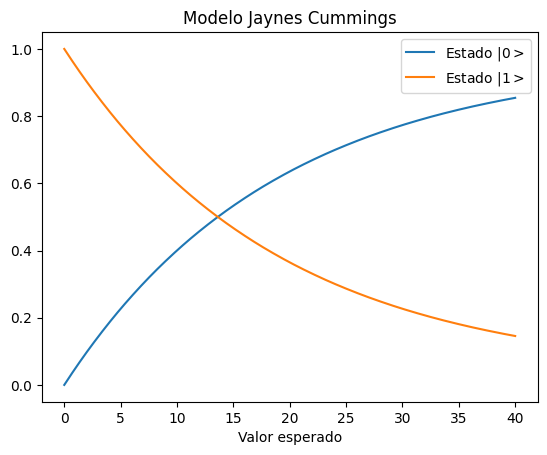

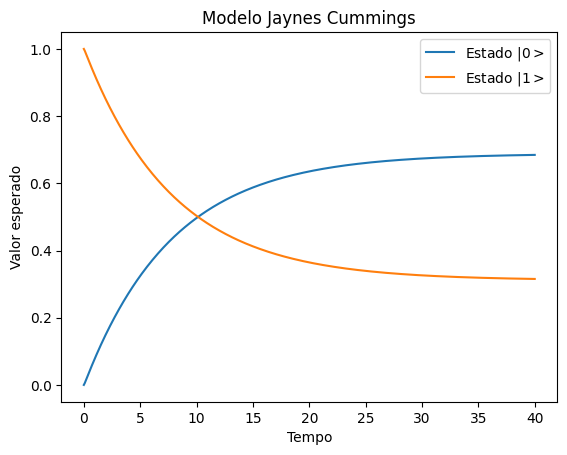

In [2]:
# Parâmetros do sistema
# hbarra = 1.0
omega0 = 1.0  # Frequência de transição do átomo
omega_laser = 0.01  # Frequência do laser
g = 0.5  # Acoplamento átomo-laser
gamma = 0.15  # Taxa de dissipação
N = 2 # Número de estados no espaço de Fock
hbar = 1.0      # constante de Planck reduzida
omega_s_values = np.array([1.0])  # frequências angulares dos modos

# Número de modos
N_modes = len(omega_s_values)

# Operadores de aniquilação para os modos
a = [qt.destroy(N) for _ in range(N_modes)]

# Termos da Hamiltoniana associados a cada modo
hamiltonian_terms = [hbar * omega_s * (a[i].dag() * a[i] + 0.5) for i, omega_s in enumerate(omega_s_values)]

# Hamiltoniana total
H_rad = qt.tensor(qt.qeye(2),sum(hamiltonian_terms))


# Operadores de Pauli
sz = qt.tensor(qt.sigmaz(), qt.qeye(N))
sx = qt.tensor(qt.sigmax(), qt.qeye(N))
sm = qt.tensor(qt.sigmam(), qt.qeye(N))  # Operador de abaixamento

# Hamiltoniana do átomo de dois níveis
H_atom = qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag()-qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N))

# operador de destruição do vacuo
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do laser
H_int =omega_laser*sx+ g*sx *1j*(a - a.dag())

# Hamiltoniana total
H = H_atom + H_int + H_rad

# Operadores de colapso (Lindblad)
collapse_operators = [np.sqrt(0.05)*sm.dag(),25*a]

# Condição inicial
psi0 = qt.tensor(qt.basis(2, 1), qt.basis(N, 0))  # Estado inicial: átomo no estado fundamental, campo no estado de vácuo


# Lista de tempos
tlist = np.linspace(0, 40, 500)

# Resolvendo a equação mestra de Lindblad
result = qt.mesolve(H, psi0, tlist, collapse_operators)

# Visualização dos resultados
expect_s0 = qt.expect(qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sz ao longo do tempo

expect_s1 = qt.expect(qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sx ao longo do tempo
plt.title("Modelo Jaynes Cummings")
plt.plot(tlist, expect_s0, label='Estado $|0>$')
plt.plot(tlist, expect_s1, label='Estado $|1>$')
plt.xlabel('Valor esperado')
plt.ylabel('')
plt.legend()
plt.show()

# Operadores de colapso (Lindblad)
collapse_operators = [np.sqrt(0.05)*sm.dag(),5*a]

# Condição inicial
psi0 = qt.tensor(qt.basis(2, 1), qt.basis(N, 0))  # Estado inicial: átomo no estado fundamental, campo no estado de vácuo

# Resolvendo a equação mestra de Lindblad
result = qt.mesolve(H, psi0, tlist, collapse_operators)

# Visualização dos resultados
expect_s0 = qt.expect(qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sz ao longo do tempo

expect_s1 = qt.expect(qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sx ao longo do tempo
plt.title("Modelo Jaynes Cummings")
plt.plot(tlist, expect_s0, label='Estado $|0>$')
plt.plot(tlist, expect_s1, label='Estado $|1>$')
plt.xlabel('Tempo')
plt.ylabel('Valor esperado')
plt.legend()
plt.show()


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]


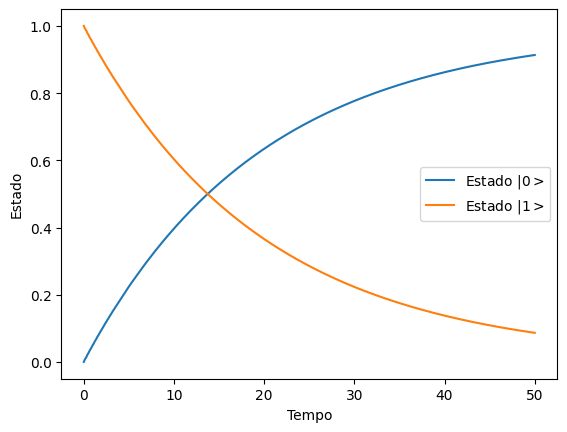

In [ ]:
# Parâmetros do sistema
# hbarra = 1.0
omega0 = 1.0  # Frequência de transição do átomo
omega_laser = 0.01  # Frequência do laser
g = 0.5  # Acoplamento átomo-laser
gamma = 0.15  # Taxa de dissipação
N = 2 # Número de estados no espaço de Fock
hbar = 1.0      # constante de Planck reduzida
omega_s_values = np.array([1.0, 5.0, 5.0, 5.0, 5.0])  # frequências angulares dos modos

# Número de modos
N_modes = len(omega_s_values)

# Operadores de aniquilação para os modos
a = [qt.destroy(N) for _ in range(N_modes)]

# Termos da Hamiltoniana associados a cada modo
hamiltonian_terms = [hbar * omega_s * (a[i].dag() * a[i] + 0.5) for i, omega_s in enumerate(omega_s_values)]

# Hamiltoniana total
H_rad = qt.tensor(qt.qeye(2),sum(hamiltonian_terms))


# Operadores de Pauli
sz = qt.tensor(qt.sigmaz(), qt.qeye(N))
sx = qt.tensor(qt.sigmax(), qt.qeye(N))
sm = qt.tensor(qt.sigmam(), qt.qeye(N))  # Operador de abaixamento

# Hamiltoniana do átomo de dois níveis
H_atom = qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag()-qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N))

# operador de destruição do vacuo
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do laser
H_int = omega_laser*sx+ g*sx *1j*(a - a.dag())

# Hamiltoniana total
H = H_atom + H_int + H_rad

# Operadores de colapso (Lindblad)
collapse_operators = [np.sqrt(0.05)*sm.dag(),1*a.dag()]

# Condição inicial
psi0 = qt.tensor(qt.basis(2, 1), qt.basis(N, 0))  # Estado inicial: átomo no estado fundamental, campo no estado de vácuo

print(psi0)

# Lista de tempos
tlist = np.linspace(0, 50, 500)

# Resolvendo a equação mestra de Lindblad
result = qt.mesolve(H, psi0, tlist, collapse_operators)

# Visualização dos resultados
expect_s0 = qt.expect(qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sz ao longo do tempo

expect_s1 = qt.expect(qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sx ao longo do tempo

plt.plot(tlist, expect_s0, label='Estado $|0>$')
plt.plot(tlist, expect_s1, label='Estado $|1>$')
plt.xlabel('Tempo')
plt.ylabel('Estado')
plt.legend()
plt.show()


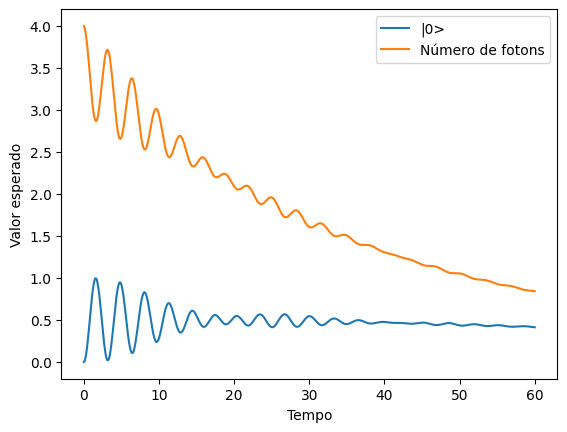

In [ ]:
# Parâmetros do sistema
# hbarra = 1.0
omega0 = 1.0  # Frequência de transição do átomo
omega_laser = 0.01  # Frequência do laser
g = 0.5  # Acoplamento átomo-laser
gamma = 0.15  # Taxa de dissipação
N = 10 # Número de estados no espaço de Fock
hbar = 1.0      # constante de Planck reduzida
omega_s = 1.0  # frequências angulares dos modos


# Operadores de aniquilação para os modos
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana total
H_rad = omega_s*a*a.dag()

# Operadores de Pauli
sz = qt.tensor(qt.sigmaz(), qt.qeye(N))
sx = qt.tensor(qt.sigmax(), qt.qeye(N))
sp = qt.tensor(qt.sigmap(), qt.qeye(N))
sm = qt.tensor(qt.sigmam(), qt.qeye(N))  # Operador de abaixamento

# Hamiltoniana do átomo de dois níveis
H_atom = qt.tensor(qt.sigmaz(),qt.qeye(N))*0.5

# operador de destruição do vacuo
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do laser
H_int = g*1j*(a*sp - sm*a.dag())

# Hamiltoniana total
H = H_atom + H_int + H_rad

# Operadores de colapso (Lindblad)
collapse_operators = [np.sqrt(0.025)*a]

# Condição inicial
psi0 = qt.tensor(qt.basis(2,1), qt.basis(N, 4))  # Estado inicial: átomo no estado fundamental, campo no estado de vácuo

#print(psi0)

# Lista de tempos
tlist = np.linspace(0, 60, 1000)

# Resolvendo a equação mestra de Lindblad
result = qt.mesolve(H, psi0, tlist, collapse_operators,[sm.dag()*sm,a.dag()*a])

# Visualização dos resultados
#expect_s0 = qt.expect(qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sz ao longo do tempo

#expect_s1 = qt.expect(qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sx ao longo do tempo
plt.plot(result.times, result.expect[0], label='|0>')
plt.plot(result.times, result.expect[1], label='Número de fotons')
plt.xlabel('Tempo')
plt.ylabel('Valor esperado')
plt.legend()
plt.show()


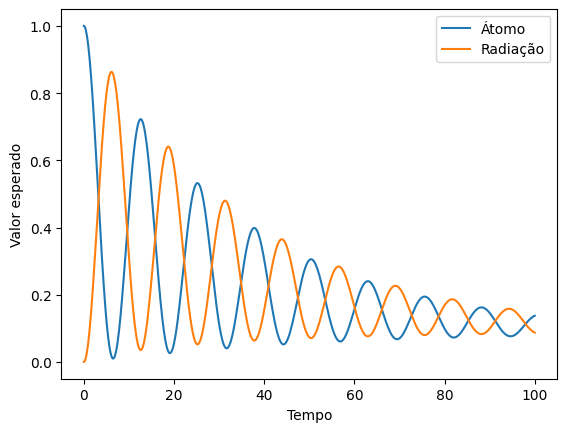

In [ ]:
# Parâmetros do sistema
# hbarra = 1.0
omega0 = 5.0  # Frequência de transição do átomo
omega_laser = 0.1  # Frequência do laser
g = 0.25  # Acoplamento átomo-laser
gamma = 0.15  # Taxa de dissipação
N = 10 # Número de estados no espaço de Fock
hbar = 1.0      # constante de Planck reduzida
omega_s = 1.0  # frequências angulares dos modos


# Operadores de aniquilação para os modos
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana total
H_rad = omega_s*a*a.dag()

# Operadores de Pauli
sz = qt.tensor(qt.sigmaz(), qt.qeye(N))
sx = qt.tensor(qt.sigmax(), qt.qeye(N))
sp = qt.tensor(qt.sigmap(), qt.qeye(N))
sm = qt.tensor(qt.sigmam(), qt.qeye(N))  # Operador de abaixamento

# Hamiltoniana do átomo de dois níveis
H_atom = qt.tensor(qt.sigmaz(),qt.qeye(N))*0.5

# operador de destruição do vacuo
a = qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do laser
H_int = g*1j*(a*sp - sm*a.dag())

# Hamiltoniana total
H = H_atom + H_int + H_rad

# Operadores de colapso (Lindblad)
collapse_operators = [np.sqrt(0.005)*sm.dag(),np.sqrt(0.05)*a]

# Condição inicial
psi0 = qt.tensor(qt.basis(2,0), qt.basis(N, 0))  # Estado inicial: átomo no estado fundamental, campo no estado de vácuo

#print(psi0)

# Lista de tempos
tlist = np.linspace(0, 100, 1000)

# Resolvendo a equação mestra de Lindblad
result = qt.mesolve(H, psi0, tlist, collapse_operators,[sm.dag()*sm,a.dag()*a])

# Visualização dos resultados
#expect_s0 = qt.expect(qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sz ao longo do tempo

#expect_s1 = qt.expect(qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)), result.states)  # Expectativa do operador sx ao longo do tempo

plt.plot(result.times, result.expect[0], label='Átomo')
plt.plot(result.times, result.expect[1], label='Radiação')
plt.xlabel('Tempo')
plt.ylabel('Valor esperado')
plt.legend()
plt.show()


# Decoerência

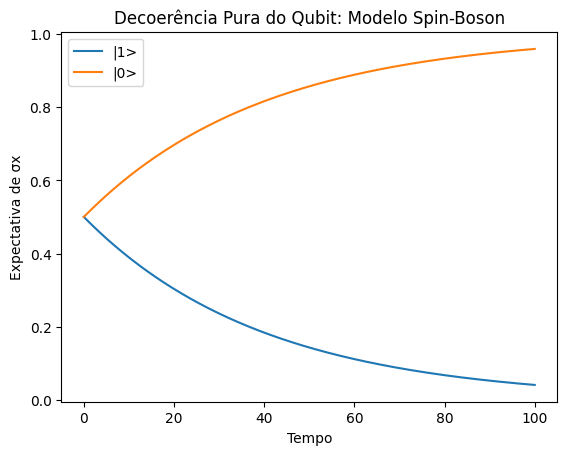

In [3]:
from qutip import *

# Parâmetros do Modelo
omega_qubit = 1  # Frequência do qubit
omega_boson = 0.1  # Frequência dos modos bosônicos
g = 0.05           # Acoplamento qubit-boson
T = 5.0            # Tempo total de simulação
dt = 0.01          # Passo de tempo
N = 4 # Número de pontos de tempo

# Operadores de Pauli
sx = qt.tensor(qt.sigmax(),qt.qeye(N))
sz = qt.tensor(qt.sigmaz(),qt.qeye(N))
sm = qt.tensor(qt.sigmam(),qt.qeye(N))
# operador de destruição
a= qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do Spin-Boson
H_qubit = 0.5 * omega_qubit * sz
H_boson = omega_boson * a.dag()*a
H_interaction = g * sz*(a +a.dag())
H = H_qubit + H_boson + H_interaction

# Estado Inicial do Sistema (Qubit inicialmente em |0⟩)
psi0 = qt.tensor((qt.basis(2, 0)+qt.basis(2,1))/np.sqrt(2), qt.basis(N, 0))

# Lista de tempos
times = np.linspace(0, 100, 1000)

# Resolvendo a Equação Mestra de Lindblad
result = mesolve(H, psi0, times, [np.sqrt(0.025)*sm,np.sqrt(0.1)*a], [qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)),qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)),sz])

solve=expect(qt.tensor(sx,qeye(2)), result.states)
# Plotando a Expectativa do Operador de Pauli σx
plt.plot(times,  result.expect[0],label='|1>')
plt.plot(times,  result.expect[1],label='|0>')
#plt.plot(times,  result.expect[2],label='sz')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Expectativa de σx')
plt.title('Decoerência Pura do Qubit: Modelo Spin-Boson')
plt.show()


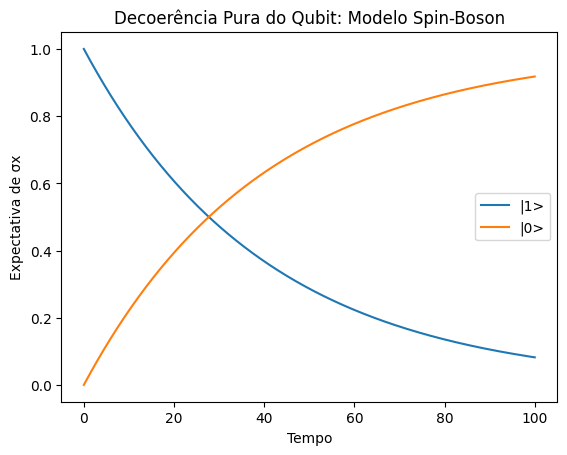

In [4]:
# Parâmetros do Modelo
omega_qubit = 1  # Frequência do qubit
omega_boson = 0.1  # Frequência dos modos bosônicos
g = 0.05           # Acoplamento qubit-boson
T = 5.0            # Tempo total de simulação
dt = 0.01          # Passo de tempo
N = 4 # Número de pontos de tempo

# Operadores de Pauli
sx = qt.tensor(qt.sigmax(),qt.qeye(N))
sz = qt.tensor(qt.sigmaz(),qt.qeye(N))
sm = qt.tensor(qt.sigmam(),qt.qeye(N))
# operador de destruição
a= tensor(qeye(2),destroy(N))

# Hamiltoniana do Spin-Boson
H_qubit = 0.5 * omega_qubit * sz
H_boson = omega_boson * a.dag()*a
H_interaction = g * sz*(a +a.dag())
H = H_qubit + H_boson + H_interaction

# Estado Inicial do Sistema (Qubit inicialmente em |0⟩)
psi0 = tensor(basis(2, 0), basis(N, 0))

# Lista de tempos
times = np.linspace(0, 100, 1000)

# Resolvendo a Equação Mestra de Lindblad
result = mesolve(H, psi0, times, [np.sqrt(0.025)*sm,np.sqrt(0.1)*a], [qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)),qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)),sz])

solve=expect(tensor(sx,qeye(2)), result.states)
# Plotando a Expectativa do Operador de Pauli σx
plt.plot(times,  result.expect[0],label='|1>')
plt.plot(times,  result.expect[1],label='|0>')
#plt.plot(times,  result.expect[2],label='sz')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Expectativa de σx')
plt.title('Decoerência Pura do Qubit: Modelo Spin-Boson')
plt.show()


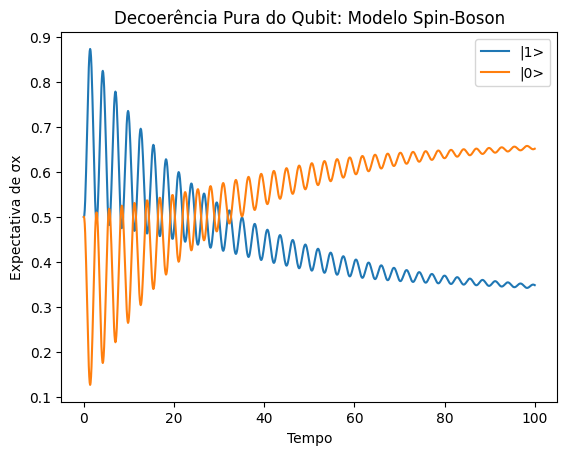

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parâmetros do Modelo
epsilon = 1 #
omega_qubit = 1  # Frequência do qubit
omega_boson = 0.1  # Frequência dos modos bosônicos
g = 0.05           # Acoplamento qubit-boson
T = 5.0            # Tempo total de simulação
dt = 0.01          # Passo de tempo
N = 4 # Número de pontos de tempo

# Operadores de Pauli
sx = qt.tensor(qt.sigmax(),qt.qeye(N))
sz = qt.tensor(qt.sigmaz(),qt.qeye(N))
sm = qt.tensor(qt.sigmam(),qt.qeye(N))
# operador de destruição
a= qt.tensor(qt.qeye(2),qt.destroy(N))

# Hamiltoniana do Spin-Boson
H_qubit = 0.5 * omega_qubit * sz + epsilon * sx
H_boson = omega_boson * a.dag()*a
H_interaction = g * sz*(a +a.dag())
H = H_qubit + H_boson + H_interaction

# Estado Inicial do Sistema (Qubit inicialmente em |0⟩)
psi0 = qt.tensor((qt.basis(2, 0)+qt.basis(2,1))/np.sqrt(2), basis(N, 0))

# Lista de tempos
times = np.linspace(0, 100, 1000)

# Resolvendo a Equação Mestra de Lindblad
result = mesolve(H, psi0, times, [np.sqrt(0.05)*sm,np.sqrt(0.025)*a], [qt.tensor(qt.basis(2,0)*qt.basis(2,0).dag(),qt.qeye(N)),qt.tensor(qt.basis(2,1)*qt.basis(2,1).dag(),qt.qeye(N)),sx,sz])

solve=expect(tensor(sx,qeye(2)), result.states)
 #Plotando a Expectativa do Operador de Pauli σx
plt.plot(times,  result.expect[0],label='|1>')
plt.plot(times,  result.expect[1],label='|0>')
plt.legend()
plt.xlabel('Tempo')
plt.ylabel('Expectativa de σx')
plt.title('Decoerência Pura do Qubit: Modelo Spin-Boson')
plt.show()
